In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', sep='\t')

In [3]:
df.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
## check if there are any missing values in the df column 
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

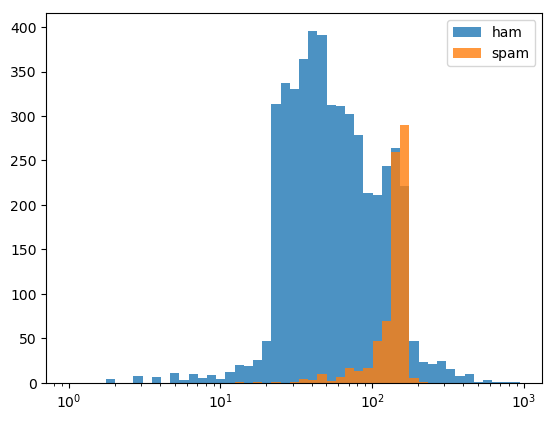

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

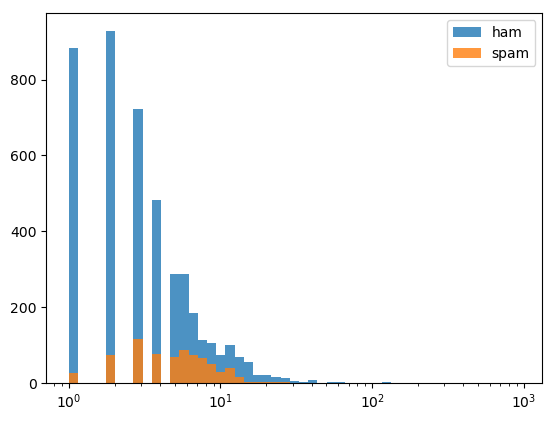

In [13]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# X feature data
X = df[['length','punct']]
# y our label
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)



In [17]:
X_train.shape

(3900, 2)

In [18]:
X_test.shape

(1672, 2)

In [19]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr_model = LogisticRegression(solver='lbfgs')

In [24]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
from sklearn import metrics


In [26]:
predictions = lr_model.predict(X_test)

In [27]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [28]:
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [29]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [30]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [31]:
metrics.accuracy_score(y_test,predictions)

0.8427033492822966

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [34]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [35]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')

In [36]:
svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[1373   75]
 [ 121  103]]


In [37]:
#####Feature extraction from text######

In [38]:
%%writefile 1.txt
This is a story about cats
our feline pets
Cats are furry animals

Writing 1.txt


In [39]:
%%writefile 2.txt
This story is about surfing
Catching waves is fun
Surfing is a popular water sport

Writing 2.txt


In [40]:
vocab = {}
i = 1

with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [41]:
with open('2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


In [42]:
one = ['1.txt']+[0]*len(vocab)
# map the frequencies of each word in 1.txt to our vector:
with open('1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    one[vocab[word]]+=1

In [43]:
# Do the same for the second document:
two = ['2.txt']+[0]*len(vocab)

with open('2.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    two[vocab[word]]+=1

In [44]:
# Compare the two vectors:
print(f'{one}\n{two}')

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['2.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]


In [46]:
df = pd.read_csv('UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', sep='\t')

In [47]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [48]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df['message']
y = df['label']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
count_vect = CountVectorizer()

In [57]:
#### FIT VECTORIZER to the data (build a vocabm count the # of words...)
count_vect.fit(X_train)
X_train_counts = count_vect.transform(X_train)

### TRANSFORM THE ORIGINAL TEXT MESSAGE ---> VECTOR
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [58]:
X_train.shape

(3733,)

In [59]:
X_train_counts.shape

(3733, 7082)

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
tfidf_transformer = TfidfTransformer()

In [62]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [63]:
X_train_tfidf.shape

(3733, 7082)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
vectorizer = TfidfVectorizer()

In [66]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [67]:
from sklearn.svm import LinearSVC

In [69]:
clf = LinearSVC()

In [70]:
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [73]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [74]:
predictions = text_clf.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
print(confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

   micro avg       0.99      0.99      0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [78]:
from sklearn import metrics

In [79]:
metrics.accuracy_score(y_test,predictions)

0.989668297988037

In [80]:
text_clf.predict(["Hi How are you doing today?"])

array(['ham'], dtype=object)

In [81]:
text_clf.predict(["Congratulations! You have won an price from our Nigerian Price. Please text us back to 112233 to get the $50 complimentary Starbucks reward. "])

array(['spam'], dtype=object)

In [82]:
######## Code along project########

In [83]:
df = pd.read_csv("UPDATED_NLP_COURSE/TextFiles/moviereviews.tsv" , sep = '\t')

In [84]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [85]:
len(df)

2000

In [86]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [87]:
df.dropna(inplace=True)

In [88]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [90]:
blanks = []
for i,lb,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [91]:
df.drop(blanks,inplace=True)

In [92]:
len(df)

1938

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [96]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf',LinearSVC())])

In [97]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [98]:
predictions = text_clf.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [100]:
print(confusion_matrix(y_test,predictions))

[[259  49]
 [ 49 283]]


In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

   micro avg       0.85      0.85      0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



In [102]:
print(accuracy_score(y_test,predictions))

0.846875
